In [1]:
import pandas as pd                                                 #pandas
import numpy as np                                                  #numpy
import sklearn                                                      # sklearn have datasets models and other things
import seaborn as sns                                               # seaborn 
import matplotlib.pyplot as plt
                  
from sklearn.model_selection import train_test_split                # divide data in test and train
                   
from sklearn import datasets, linear_model, metrics                 #import linera moduels
from sklearn.preprocessing import StandardScaler                    # scaler data for pca
from sklearn.decomposition import PCA                               #PCA 
               
from sklearn.metrics import accuracy_score                          #for logistic reg      
from sklearn.neighbors import KNeighborsRegressor  

In [2]:
algo=[]
acc=[]

In [3]:
t=pd.read_csv('titanic_class.csv')
y=t.iloc[:,[11]]
t.drop('PassengerId',axis=1,inplace=True)
t.drop('Name',axis=1,inplace=True)
t.drop('Ticket',axis=1,inplace=True)
t.drop('Cabin',axis=1,inplace=True)
t['Sex']=t['Sex'].map({'male':0,'female':1})
mean=t['Age'].mean()
me=mean//1
t['Age'].fillna(me,inplace=True)
mo=t['Embarked'].mode()[0]
t['Embarked'].fillna(mo,inplace=True)
t['Embarked']=t['Embarked'].map({'S':1, 'C':2, 'Q':3})
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
vs = sc.fit_transform(t)
df = pd.DataFrame(vs)
X=df.iloc[:,[0,1,2,3,4,5,6]]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)



In [4]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [5]:
from sklearn.linear_model import LogisticRegression
alg='LogisticRegression'
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)
Accuracy=accuracy_score(y_test, y_pred)
algo.append(alg)
acc.append(Accuracy)

C:\Users\Acer1\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
vs = MM.fit_transform(t)
df = pd.DataFrame(vs)
X=df.iloc[:,[0,1,2,3,4,5,6]]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:

from sklearn.neighbors import KNeighborsClassifier
alg='KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred2=knn.predict(X_test)
Accuracy=accuracy_score(y_test, y_pred)
algo.append(alg)
acc.append(Accuracy)

C:\Users\Acer1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [8]:


from sklearn import svm
alg='SVM'
sv= svm.SVC()
sv.fit(X_train, y_train)

y_pred=sv.predict(X_test)
Accuracy=accuracy_score(y_test, y_pred)
algo.append(alg)
acc.append(Accuracy)

C:\Users\Acer1\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
from sklearn.tree import DecisionTreeClassifier
alg='Decision Tree'
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred= dt.predict(X_test)
Accuracy=accuracy_score(y_test, y_pred)
algo.append(alg)
acc.append(Accuracy)

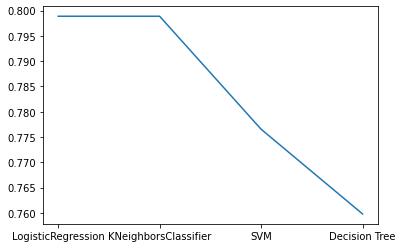

In [10]:
plt.plot(algo,acc)